<a href="https://colab.research.google.com/github/garciapg/Predicting-Visa-Approvals-with-Classification-Models/blob/main/EasyVisa_Classificaiton_Bagging%2C_Boosting%2C_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Visa Approvals with Classification Models

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. We need to:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Dictionary

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

Loading the data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/1 Data Science/Project 5/EasyVisa.csv'
df = pd.read_csv(path)

## Data Overview

In [ ]:
df.shape

(25480, 12)

There are 12 columns and 25.480 rows.

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


- The variable number of employees has a negative value, we must check it later.
- The avergae number of employes is 5.667.


In [ ]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

All the variables have more than 1 single value. We'll encode the ones with a binary category.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- Most columns are object type, with only no of employees and yr of establishment being integers, and prevailing wage a float; 9 object type, 2 integers and 1 float.

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- We can drop the case_id column since it's the primary key and it's not bringing value to the model.

Let's see the unique values of categorical variables

In [ ]:
cat_cols = df.select_dtypes(['object'])

for i in cat_cols.columns:
    print('Unique values in',i, 'are :')
    print(cat_cols[i].value_counts())
    print('*'*50)

Unique values in case_id are :
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_

- Most of the applications did not require job training, have a yearly wage unit, and were for a full-time position.
- job experience, requires job training, and full time position can be encoded to 1s and 0s.
- education and wage unit could also be converted using ordinal encoding, but we'll consider doing it after the EDA.

### Missing values

In [ ]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values.

### Duplicates

In [ ]:
duplicates = df.duplicated()

duplicates.value_counts()

False    25480
dtype: int64

There are no duplicates.

### Dropping unnecessary variables

In [ ]:
df.drop(['case_id'], axis = 1, inplace=True)

In [ ]:
df.shape

(25480, 11)

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Treating negative values

In [ ]:
df.loc[df['no_of_employees'] < 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:
df.loc[df['no_of_employees'] < 0].shape

(33, 11)

There are 33 applications with a reported negative number of employees. However, these applications seem legitimate. For that reason, we'll keep these rows with the positive value they probably intended to register.

In [ ]:
df['no_of_employees'] = df['no_of_employees'].abs()

In [ ]:
df.loc[df['no_of_employees'] < 0].shape

(0, 11)

Now all the values are positive.

### Encoding variables

Let's encode the variables with binary categories. We won't need dummies for these independent variables, and we can still analyze them in the EDA.

In [ ]:
# first we encode our dependent variable
df["case_status"] = df["case_status"].replace({'Certified':1, 'Denied':0})

# now we encode the independent variables
df["has_job_experience"] = df["has_job_experience"].replace({'Y':1, 'N':0})
df["requires_job_training"] = df["requires_job_training"].replace({'Y':1, 'N':0})
df["full_time_position"] = df["full_time_position"].replace({'Y':1, 'N':0})

In [ ]:
int_cols = df.select_dtypes(['int64'])

for i in int_cols.columns:
    print('Unique values in',i, 'are :')
    print(int_cols[i].value_counts(0))
    print('*'*50)

Unique values in has_job_experience are :
1    14802
0    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
0    22525
1     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in no_of_employees are :
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: no_of_employees, Length: 7105, dtype: int64
**************************************************
Unique values in yr_of_estab are :
1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64
**************************************************
Unique values in full_time_position are :
1    22773
0     2707
Name: full_time_position, dtype: int64
*************************************

The values and proportions pre-encoding remained the same. All variables were encoded correctly.

## Exploratory Data Analysis (EDA)

### Functions

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariante Analysis

#### Categorical Variables

continent

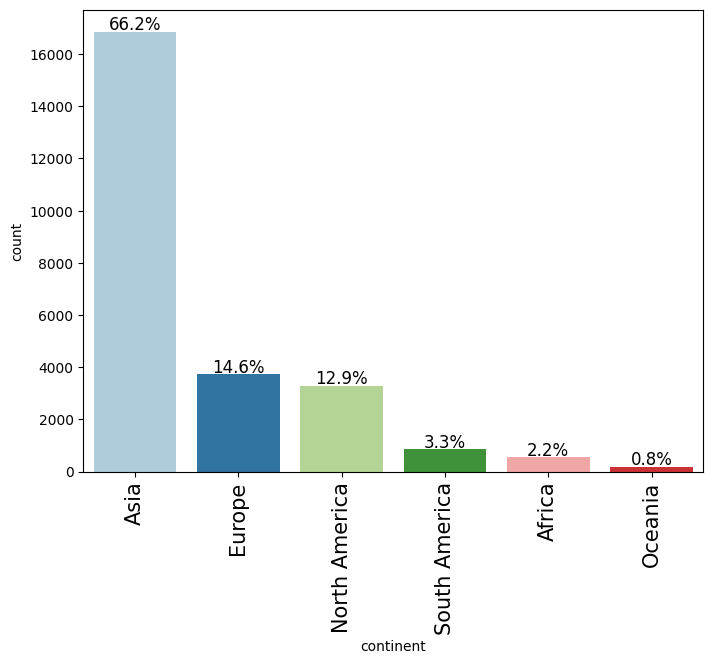

In [ ]:
labeled_barplot(df, "continent", perc=True)

- 66% of the applications are for an employee from Asia.
- The lowest number of applications come from South America, Africa, and Oceania.

education_of_employee

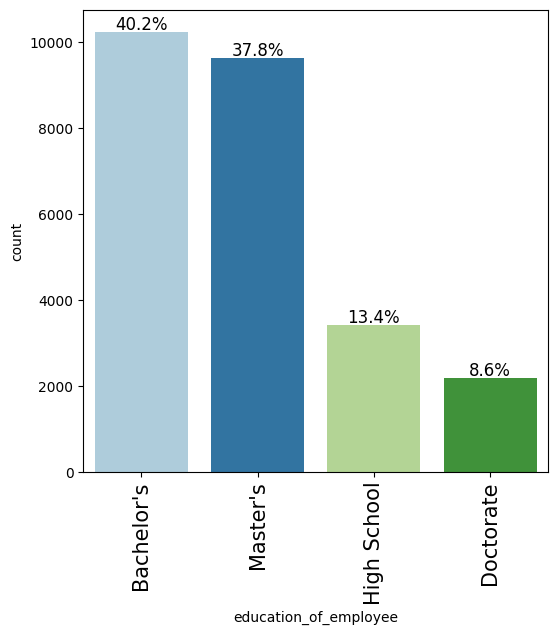

In [ ]:
labeled_barplot(df, "education_of_employee", perc=True)

- Most of the employees have either a Bachelor's or a Master's, 40.2% and 37.8% respectively.
- Highschool and Doctorate have the lowest number.

region_of_employment

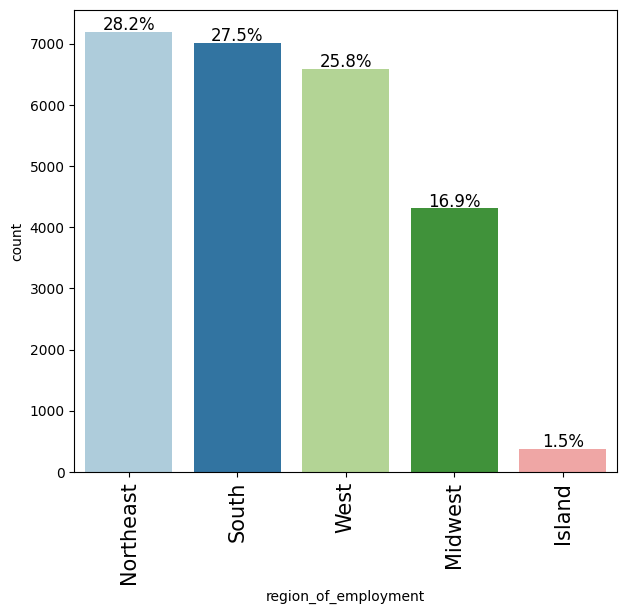

In [ ]:
labeled_barplot(df, "region_of_employment", perc=True)

- Almost 80% of the applications are for the Norteast, South, and West regions.

unit_of_wage

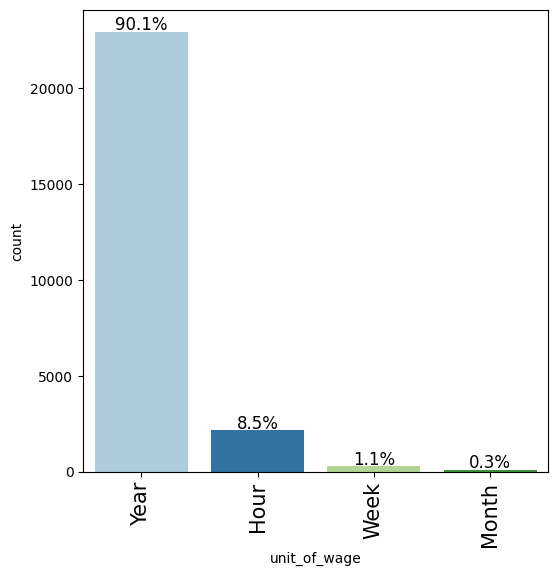

In [ ]:
labeled_barplot(df, "unit_of_wage", perc=True)

- 90% of the wages are yearly, and 8.5% hourly. Weekly and Monthly represent less than 2%.

#### Numerical Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  int64  
 3   requires_job_training  25480 non-null  int64  
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  int64  
 10  case_status            25480 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 2.1+ MB


has_job_experience

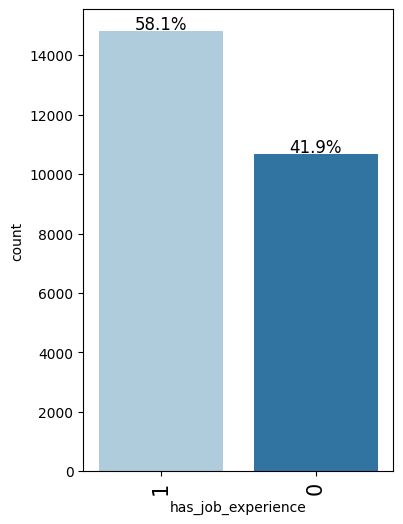

In [ ]:
labeled_barplot(df, "has_job_experience", perc=True)

- 58% of the employees have job experience, and 42% don't.

requires_job_training

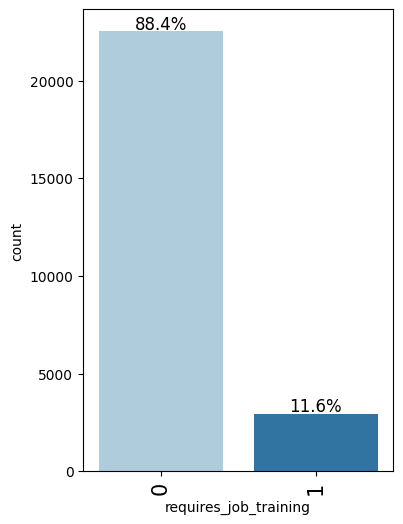

In [ ]:
labeled_barplot(df, "requires_job_training", perc=True)

- Most of the employees do not require job training (88%) and 11.6% do.

no_of_employees

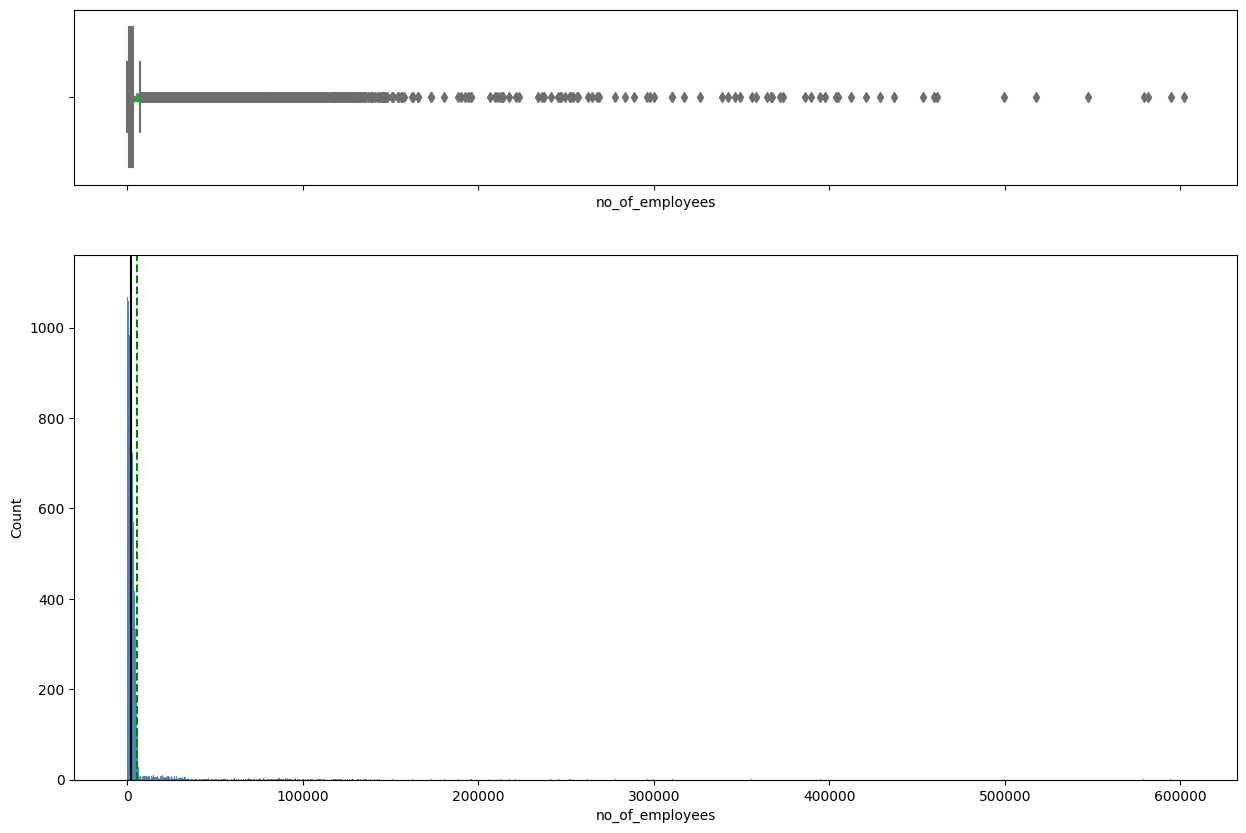

In [ ]:
histogram_boxplot(df, "no_of_employees")

- The distribution is heavily skewed to the right.
- Most of the employers are below ~10.000 employees.

yr_of_estab

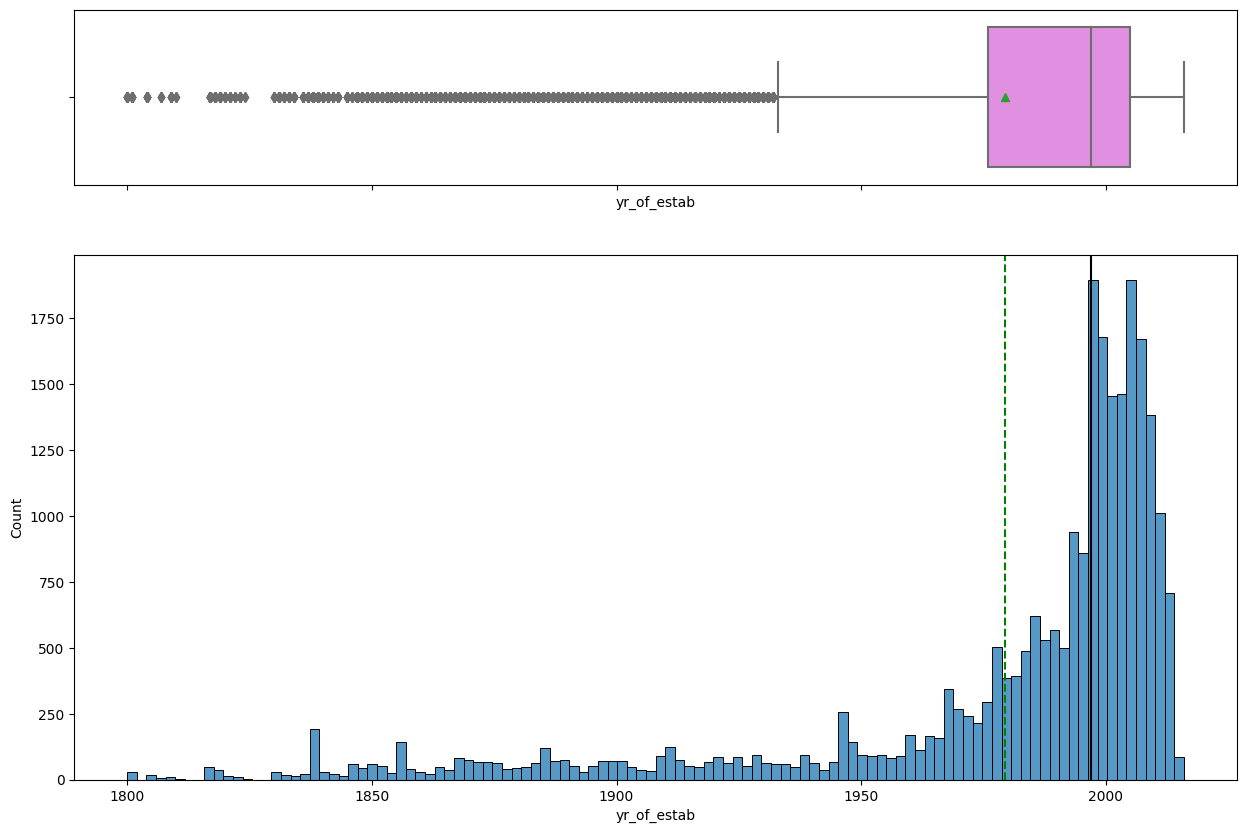

In [ ]:
histogram_boxplot(df, "yr_of_estab")

- The distribution is heavily skewed to the left.
- Most of the companies are 'newer' from the 2000s onward.

prevailing_wage

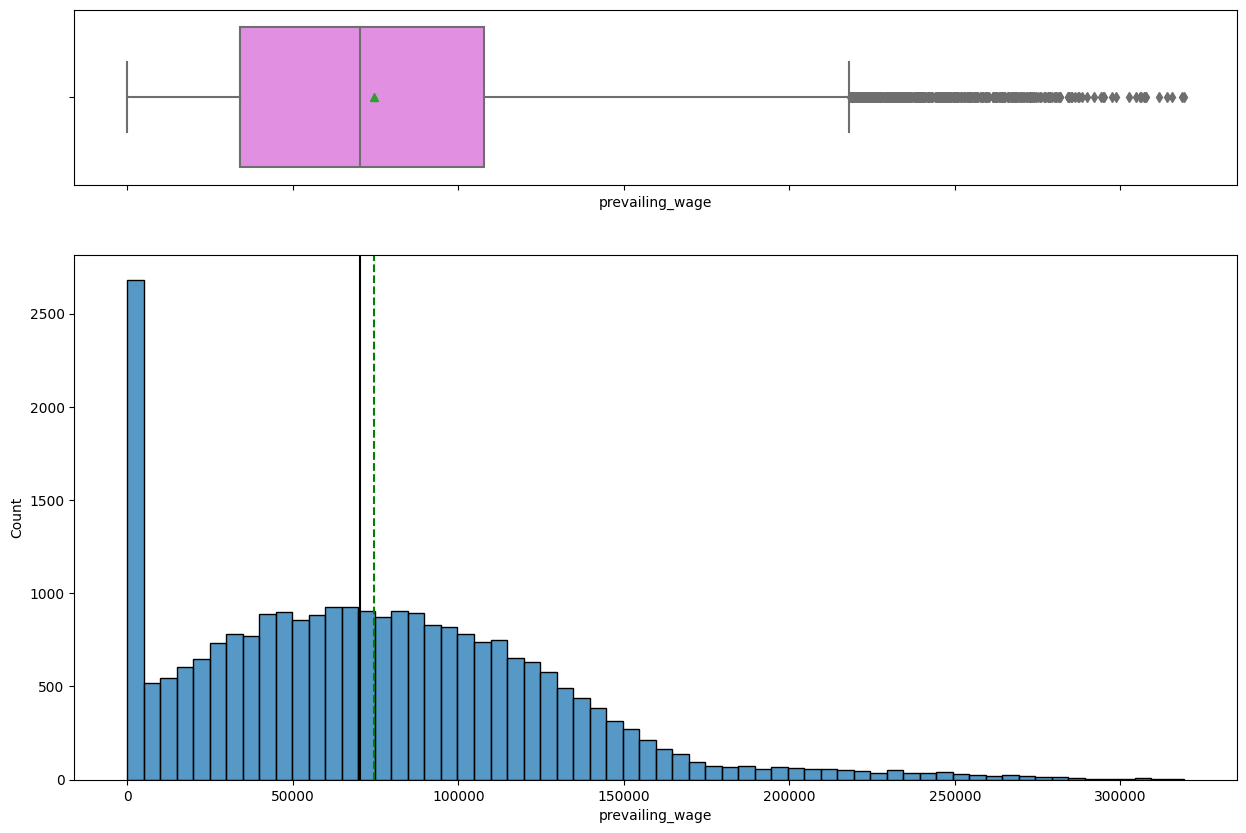

In [ ]:
histogram_boxplot(df, "prevailing_wage")

- The average prevailing wage is 75.000 dollars.
- The distribution would look more normal if all the wages were measured in the yearly format.
- Wages over ]200.000 are considered outliers, but as the wages increase, the count decreases at a normal rate. Therefore, these seem correct values.

full_time_position

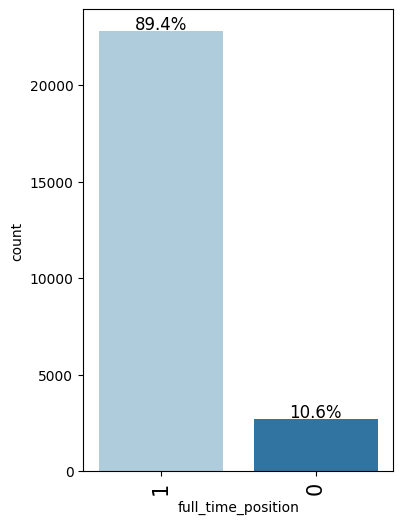

In [ ]:
labeled_barplot(df, "full_time_position", perc=True)

- 89.4% of the applications were for full-time positions, and 10.6% were not.

case_status

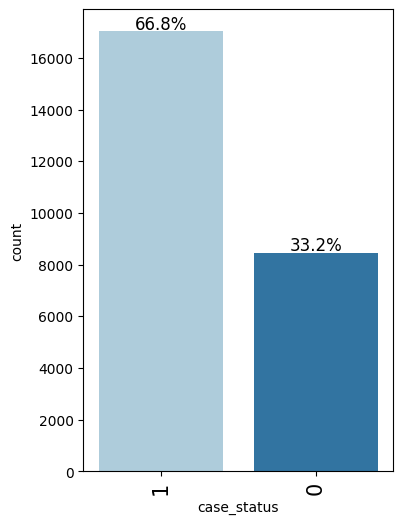

In [ ]:
labeled_barplot(df, "case_status", perc=True)

- 66.8% of the applications were certified, and 33.2% were denied.

### Bivariate analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Heatmap

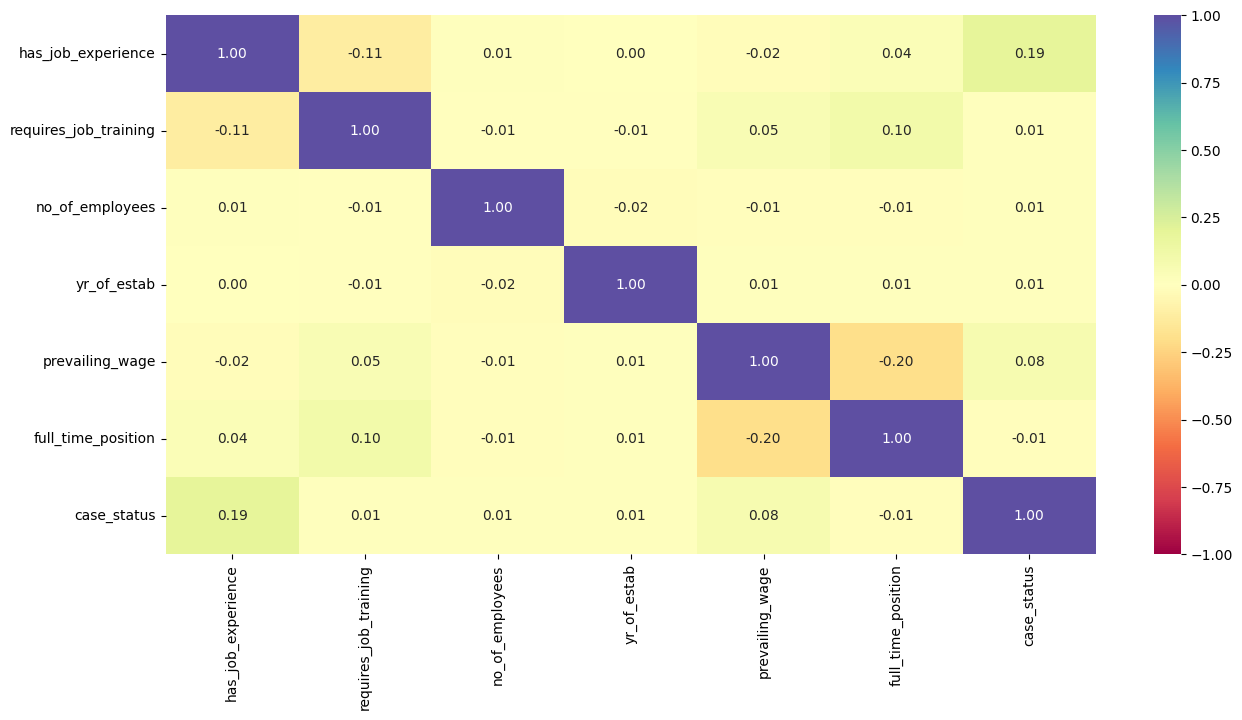

In [ ]:
# To create the heatmap, I'll create a list of only the numerical variables
corr_list = df.select_dtypes(include=np.number).columns.tolist()

# Now let's plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Overall, case_status has a low correlation with most variables, has_job_experience may be the exception.
- Full_time_position and prevailing_wage have a small negative correlation, besides them, the other variables are hardly correlated.

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


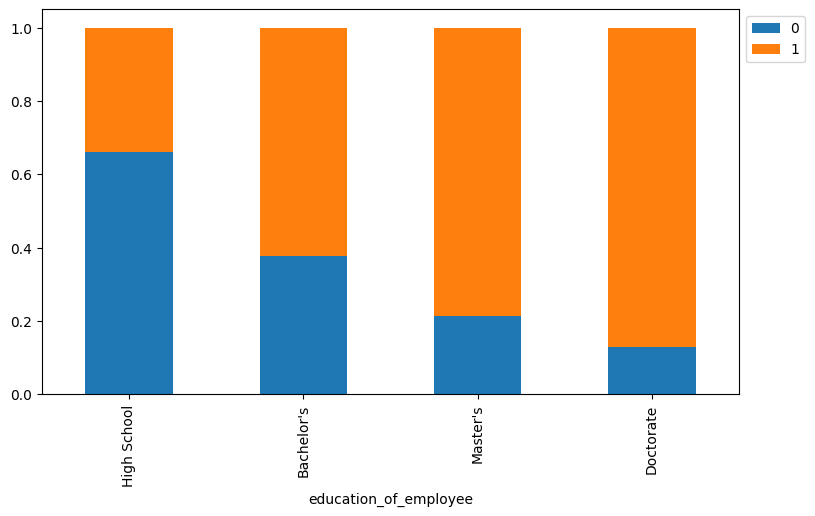

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

- Yes, as the education level increases, the rate of visa acceptance increases too. For example, acceptance rate with Masters and Doctorate is around 80%.

2. How does the visa status vary across different continents?

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


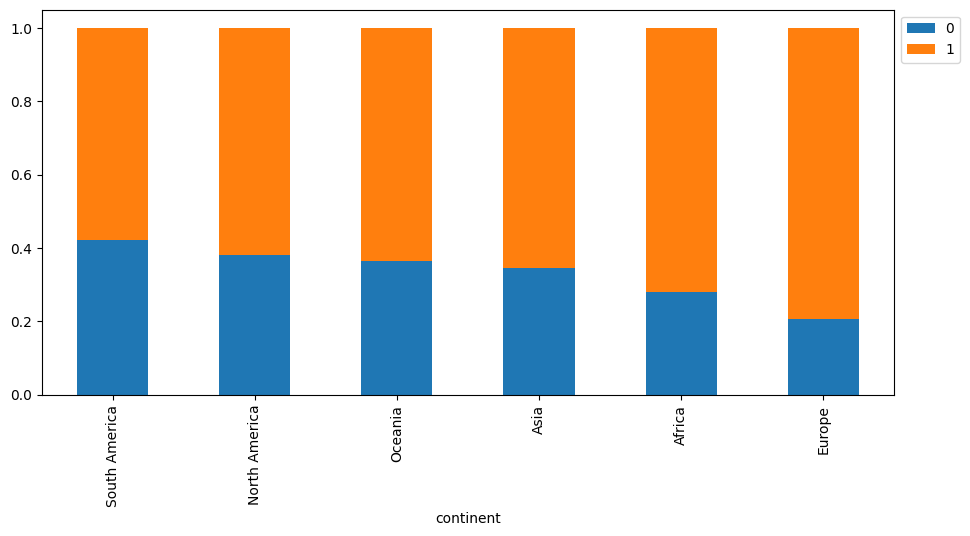

In [ ]:
stacked_barplot(df, "continent", "case_status")

- Most contients are around 60% acceptance rate, with the exception of Africa and Europe which are closer to 70% and 80% respectively.

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
0                   4684   5994  10678
1                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


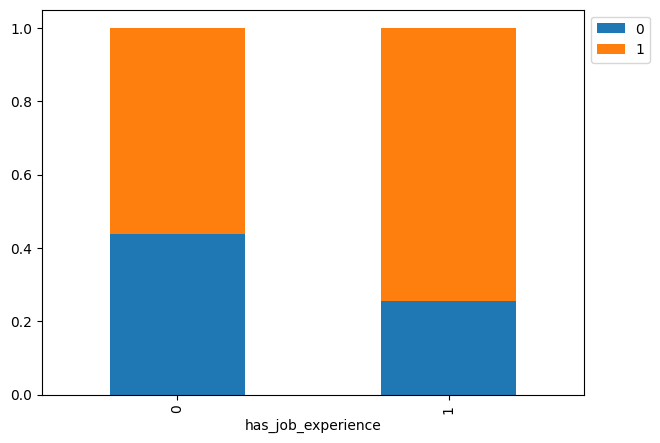

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

- Employees with job experience have a higher acceptance rate, around 75%, which is higher compared to employees without work experience, just below 60%. Having work experience definitely helps.

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


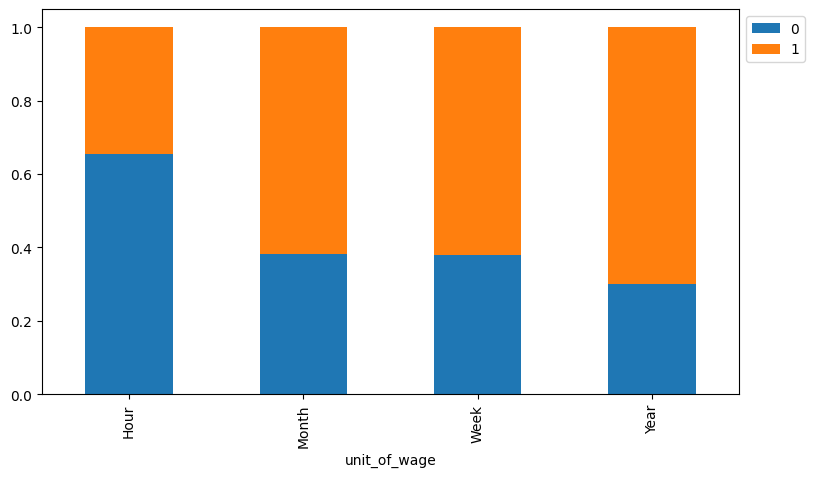

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

- Monthly, Weekly, and Yearly have a similar probability of being certified (Yearly being the highest), Hourly is the only one that has a significant lower probability.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

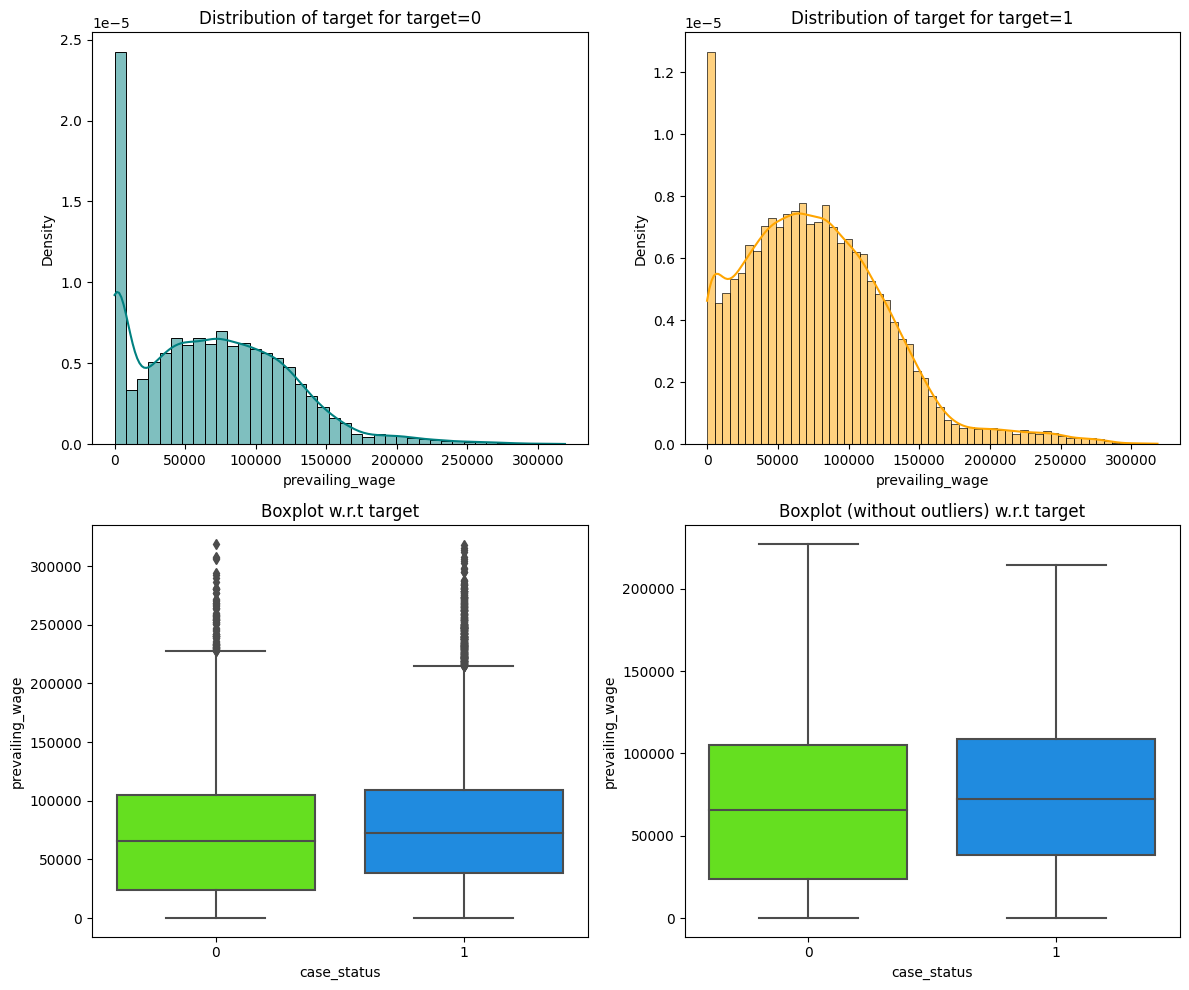

In [ ]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

- The prevailing wage distribution is pretty similar between the certified and denied visas, the main difference are in the lowest salaries, where the denied visas have a density around 2.5, and the certified visas around 1.3. Also, the density of the certified visas is a bit higher compared to the denied visas.
- On the boxplot we see the distribution is pretty smilar, although the denied visas are slightly lower.

requires_job_training vs case_status

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
0                      7513  15012  22525
1                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


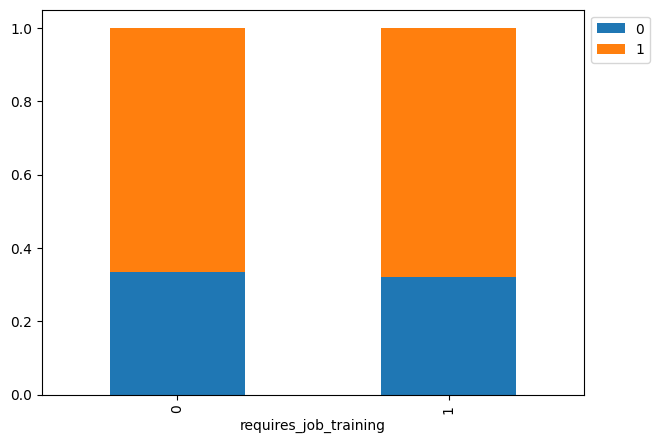

In [ ]:
stacked_barplot(df, "requires_job_training", "case_status")

- Requiring job training does not look like a significant variable when deciding if a visa is certified or not.

no_of_employees vs case_status

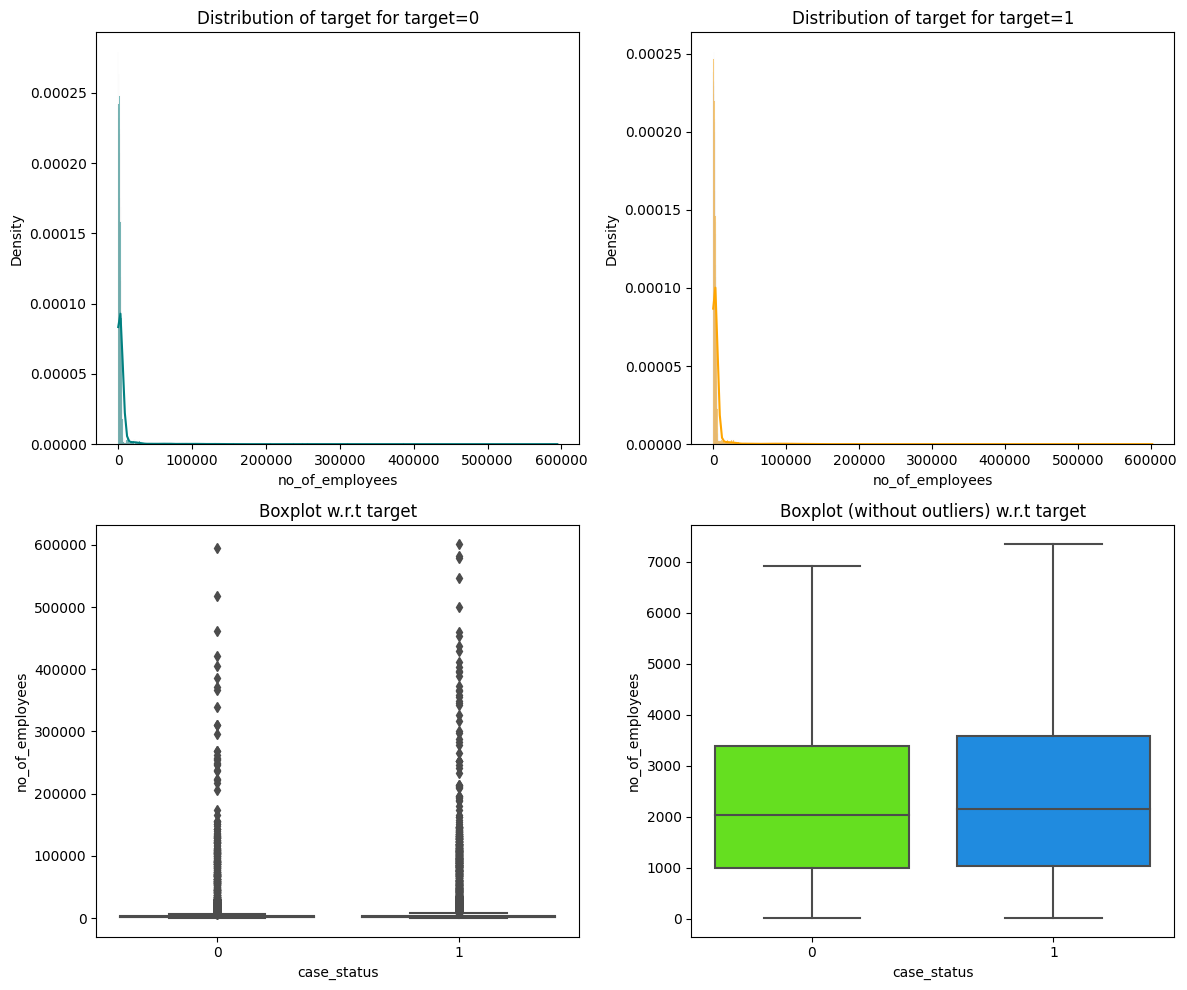

In [ ]:
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

- Both distributions of the number of employees are very similar even when differentiating between certified and denied visas. However, when analysing the boxplot without outliers, the certified visas have a slightly higher average, median, and distribution.

yr_of_estab vs case_status

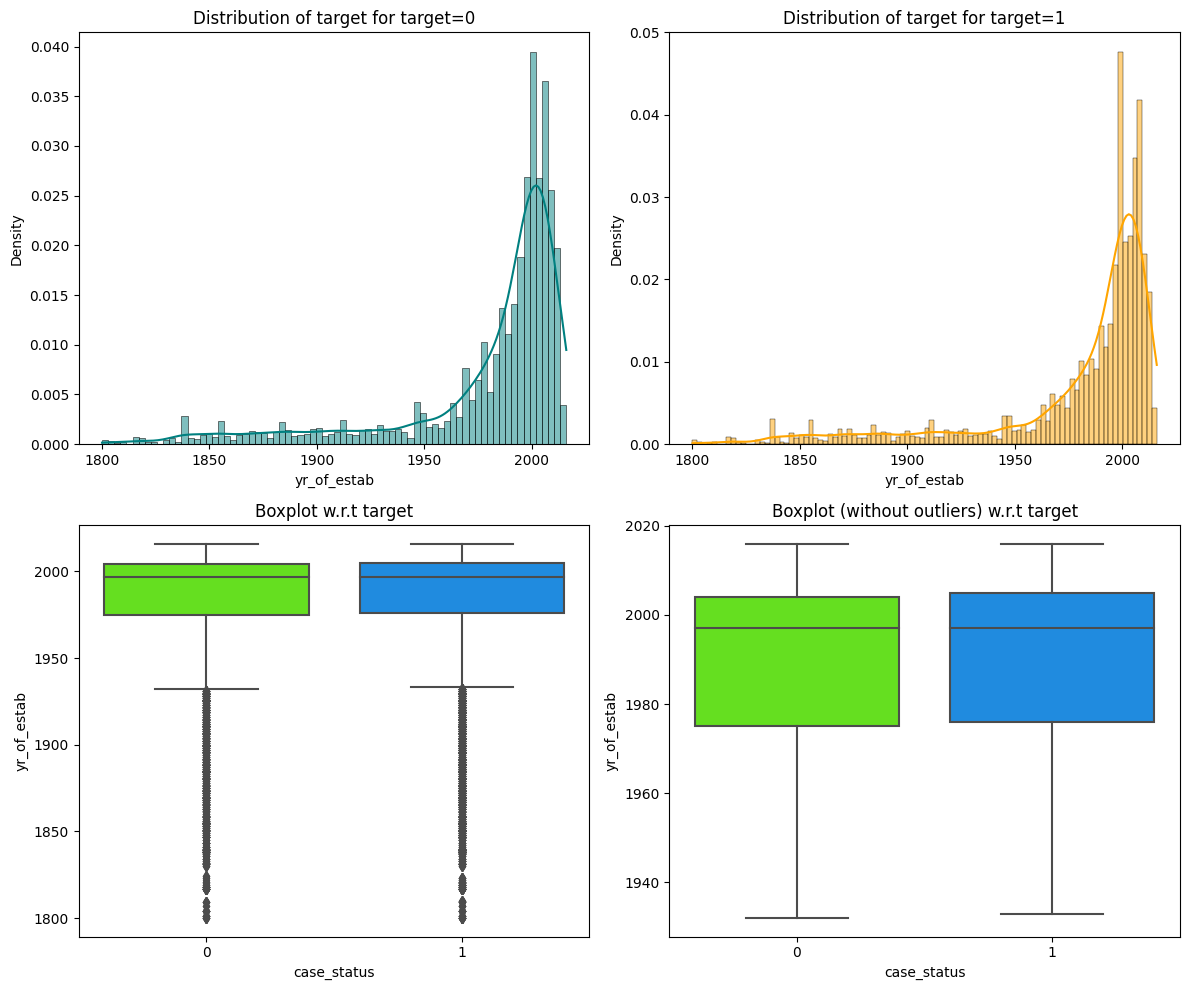

In [ ]:
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

- Similar to the number of employees, both distributions are very similar. When analysing without outliers, we see a slight difference where the average, median, and distribution of the certified visas seem slightly higher.

region_of_employment vs case_status

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


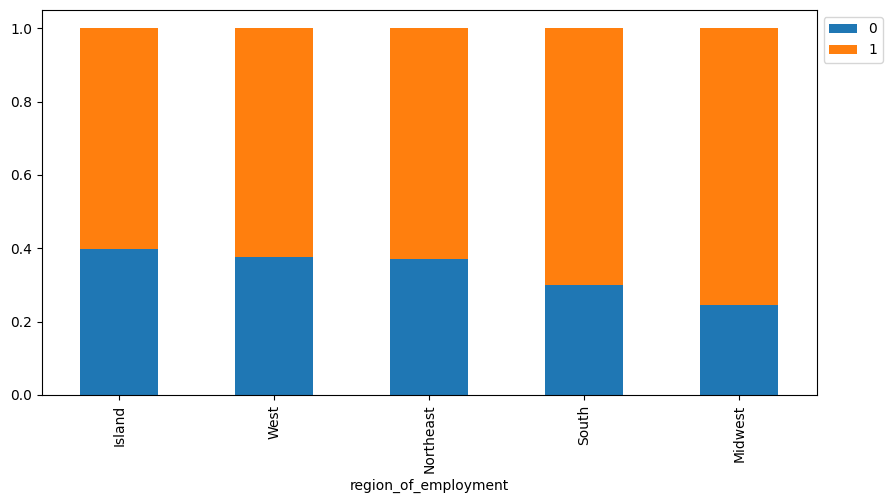

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

- Most of the regions have a acceptance rate around 60%, South and Midwest are the only ones close to 70%.

full_time_position vs case_status

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
1                   7610  15163  22773
0                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


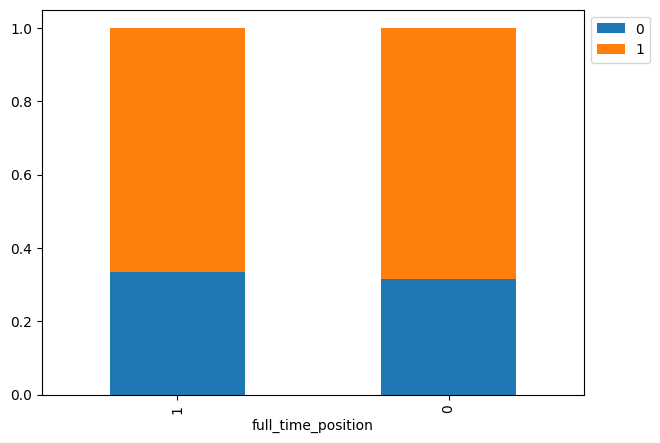

In [ ]:
stacked_barplot(df, "full_time_position", "case_status")

- If the position is full-time or not does not seem to affect the visa acceptance rate.

education_of_employee vs continent

continent              Africa   Asia  Europe  North America  Oceania  \
education_of_employee                                                  
All                       551  16861    3732           3292      192   
Master's                  288   6480    1097           1408       68   
Bachelor's                143   7168    1299           1225       66   
High School                66   2290     490            401       36   
Doctorate                  54    923     846            258       22   

continent              South America    All  
education_of_employee                        
All                              852  25480  
Master's                         293   9634  
Bachelor's                       333  10234  
High School                      137   3420  
Doctorate                         89   2192  
------------------------------------------------------------------------------------------------------------------------


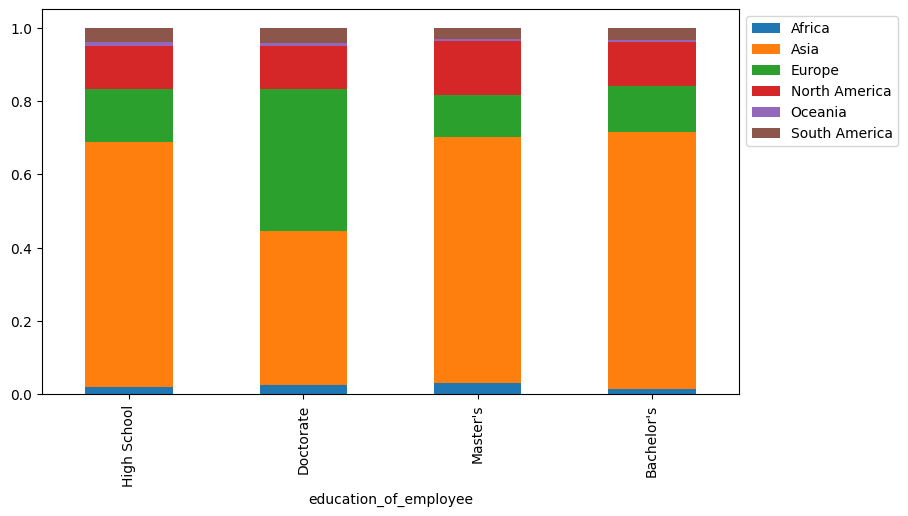

In [ ]:
stacked_barplot(df, "education_of_employee", "continent")

- Overall, Asia has the highest proportion of all levels of education.
- Europe stands out by having around 20% of the doctorates.
- Africa, South America, and North America are very consistent having around 3%, 5%, and 15% respectively of all education levels.

job_experience vs continent

continent           Africa   Asia  Europe  North America  Oceania  \
has_job_experience                                                  
All                    551  16861    3732           3292      192   
1                      334   9790    2156           1944      103   
0                      217   7071    1576           1348       89   

continent           South America    All  
has_job_experience                        
All                           852  25480  
1                             475  14802  
0                             377  10678  
------------------------------------------------------------------------------------------------------------------------


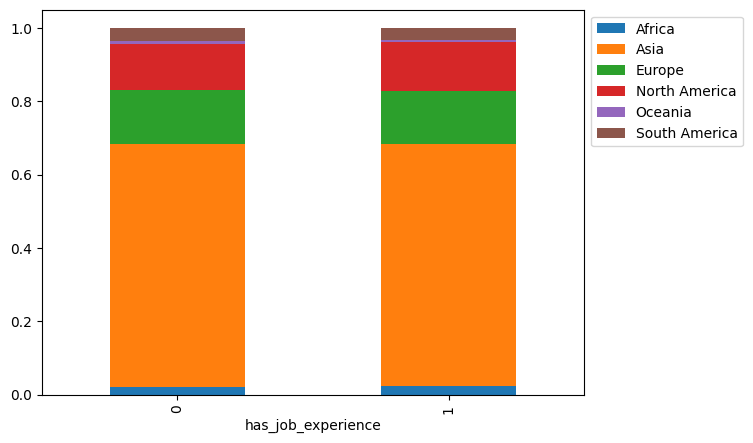

In [ ]:
stacked_barplot(df, "has_job_experience", "continent")

- There are no significant differences in job experience across the continents.

education_of_employee vs job_experience

has_job_experience         0      1    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------


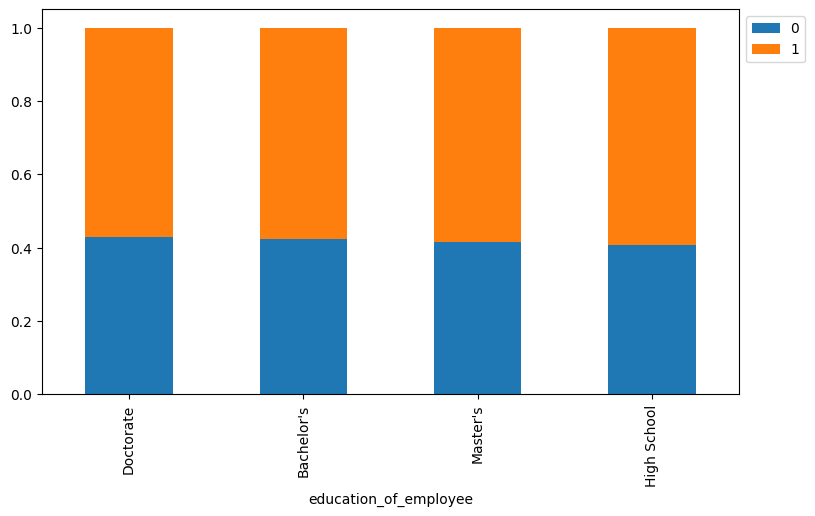

In [ ]:
stacked_barplot(df, "education_of_employee", "has_job_experience")

- There are no significant differences in job experience across the education levels.

## Data Preprocessing

- We've already analyzed missing values and did feature engineering.

- Regarding other preparation steps, in the EDA process, we discovered some variables that may have low predictive capabilities, for example, if the employee requires training, the year of establishment, and if it's a full-time position or not. However, we will still run the model with them. Even if we can't see significant differences graphically, it doesn't mean that a model can't capture them, or that they could bring value somehow. For those reasons, we'll keep the variables and run the model. We'll confirm if those variables were actually important or not when analyzing the variable importance of some of the models.

### Outliers

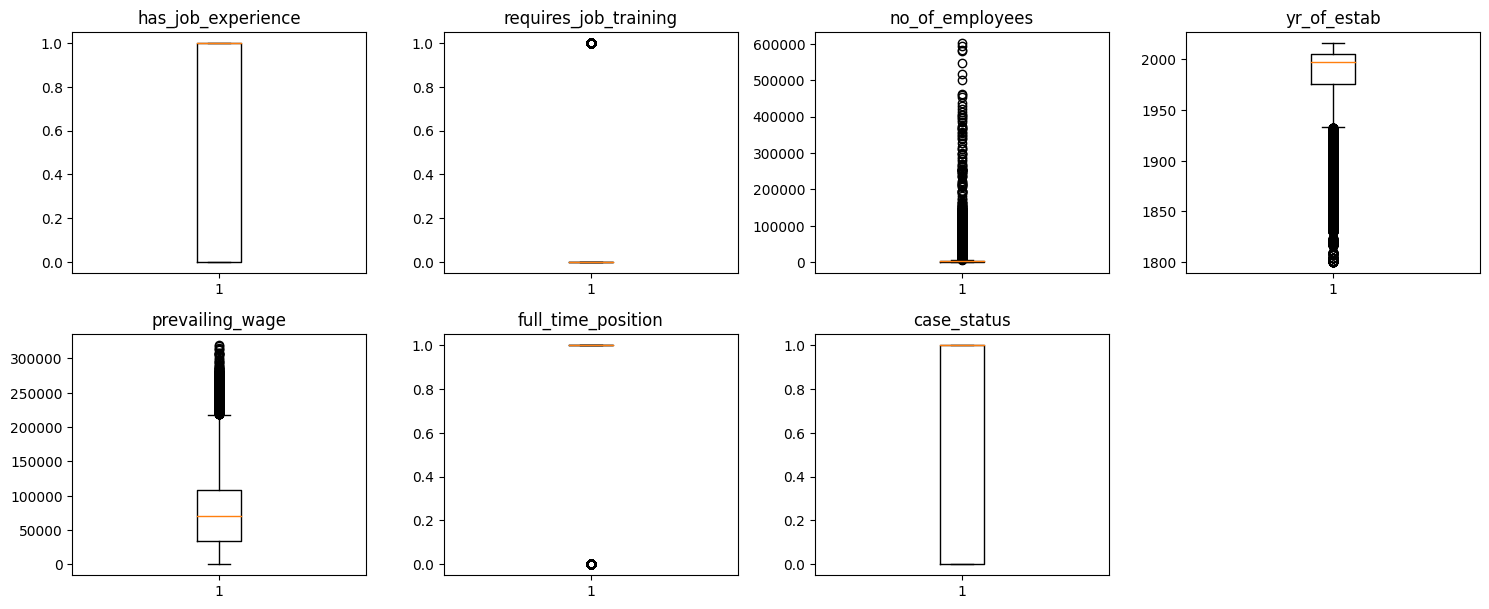

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
employees = df[df['no_of_employees'] > 500000]
employees

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1345,Asia,Bachelor's,0,0,594472,1887,West,87144.20,Year,1,0
2783,Asia,High School,1,0,517884,1979,South,108936.22,Year,1,0
9587,Asia,Bachelor's,1,0,547172,1838,Northeast,22859.22,Year,0,1
11317,Asia,Master's,0,0,579004,1969,South,103507.01,Year,0,1
20345,Asia,Master's,0,0,581468,1984,Northeast,41397.52,Year,0,1
21339,North America,Doctorate,1,0,602069,2011,Northeast,25181.63,Year,1,1


In [ ]:
years = df[df['yr_of_estab'] < 1850]
years

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
67,Europe,Doctorate,1,0,2070,1847,West,5319.4900,Year,1,1
76,Europe,Bachelor's,1,0,2423,1838,West,2927.3400,Year,1,1
132,Asia,Doctorate,0,0,928,1818,South,30570.9500,Year,1,1
136,Asia,Master's,1,0,1933,1839,Northeast,63896.3500,Year,1,1
158,North America,Master's,1,0,1926,1801,West,104281.7100,Year,1,1
...,...,...,...,...,...,...,...,...,...,...,...
25386,Asia,Doctorate,0,0,2509,1849,West,491.5601,Hour,1,1
25418,North America,Bachelor's,1,0,1733,1838,South,137279.8200,Year,1,1
25423,Asia,Master's,1,0,4017,1848,South,72947.5000,Year,0,1
25444,South America,Master's,1,0,1081,1838,Northeast,156.6070,Hour,1,1


Overall, there are well-known companies in the US that have over 1.5 million employees, such as Walmart and Amazon. Therefore, some of these companies having over 500.000 employees is not unlikely.

Similarly, there's a vast number of 'old' companies in the US being founded over 300 years ago. Therefore, some of these companies being founded over 200 years ago is not unlikely.

For those reasons we won't treat the outliers.

### Train-Test Split

In [ ]:
# Let's separate the data into dependent and independent variables
X = df.drop('case_status', axis=1)
y = df['case_status']

# Dummmies
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state =1, stratify=y
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


We have the same proportions in the training and test set, let's proceed.

### Model evaluation criteria

In this case, we want to accurately predict if an application is going to be certified or not.

- FP: An application is flagged as certified when actually it's denied.

- FN: An application is flagged as denied, when actually it's certified.

Both cases are important and represent meaningful loses to the goverment, the US employer, and the foreign employee. Therefore, the best metric for evaluation is the **F1-score**, since it minimizes both FP and FN.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree

### Decision Tree Model

In [ ]:
# Let's build the decision tree

dtree = DecisionTreeClassifier(criterion='gini', random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

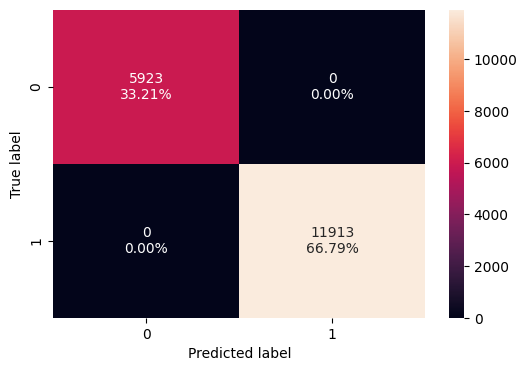

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
dtree_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
dtree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


The model predicts the train data perfectly. Let's see on the test data.

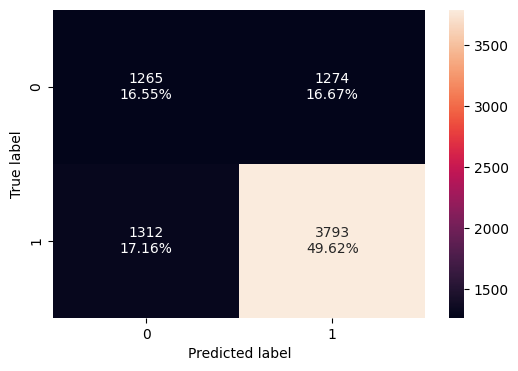

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
dtree_test_perf

,Accuracy,Recall,Precision,F1
0,0.661695,0.742997,0.748569,0.745773


- The model is clearly overfitting. Accuracy is ~66% which is pretty low, and rest of the metrics are wround 74% which is not that bad.

### Tuning Decision Tree

Here we'll use Grid Search to make the hyperparameter tuning, and F1-score as the metric we want to optimize for.

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs = -1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

- Based on the search, the max depth is 5, the max leaf nodes are 2, the minimum decrease of impurity must be 0.0001, and the minimum samples for each leaf is 3.

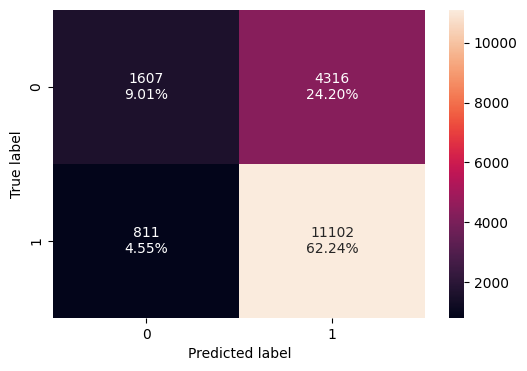

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_tuned_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


- All metrics decreased. Let's see test performance.

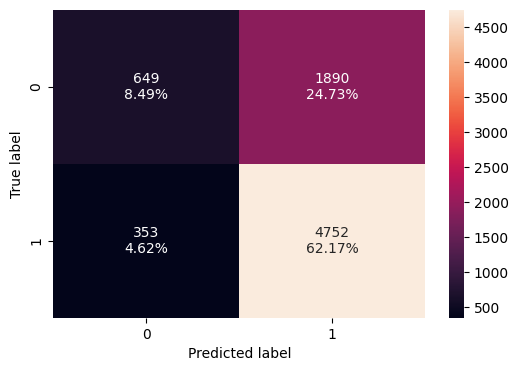

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_tuned_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


- This model has very little overfitting and a very good F1-score.
- Recall is significantly better than precision, but it's still delivering good predictions.

##  Bagging

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(random_state = 1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

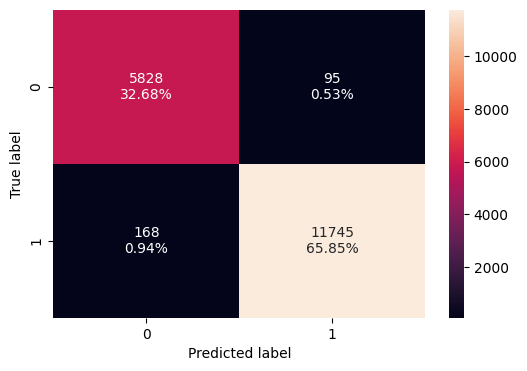

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_train_perf

,Accuracy,Recall,Precision,F1
0,0.985255,0.985898,0.991976,0.988928


- Not surprisingly, very high train scores.

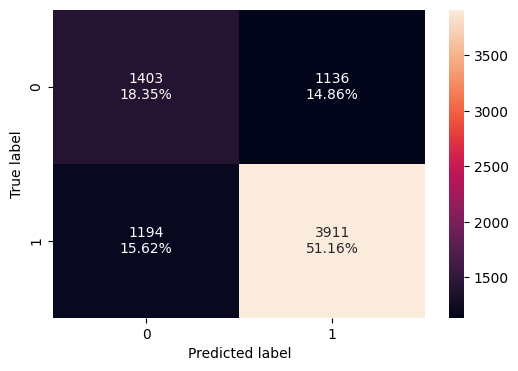

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_test_perf

,Accuracy,Recall,Precision,F1
0,0.695186,0.766112,0.774916,0.770489


- There is significant overfitting.
- Accuracy is low, precision and recall are close, and F1 is close to the tuned decision tree.

### Tuned Bagging Classifier

In [ ]:
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer,cv=5 )
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

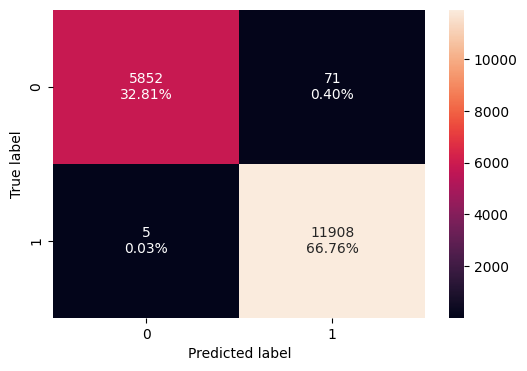

In [ ]:
confusion_matrix_sklearn(bagging_tuned, X_train, y_train)

In [ ]:
bagging_tuned_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagging_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.995739,0.99958,0.994073,0.996819


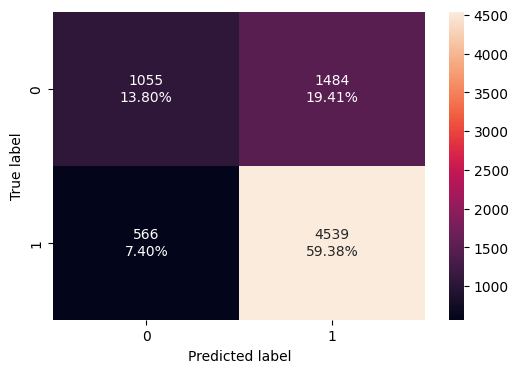

In [ ]:
confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

In [ ]:
bagging_tuned_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
bagging_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.731816,0.889128,0.753611,0.81578


- The tuned bagging has better performance than the default model, but still has overfitting issues.
- Recall is very good, but fails on precision.

## Random Forest

### Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

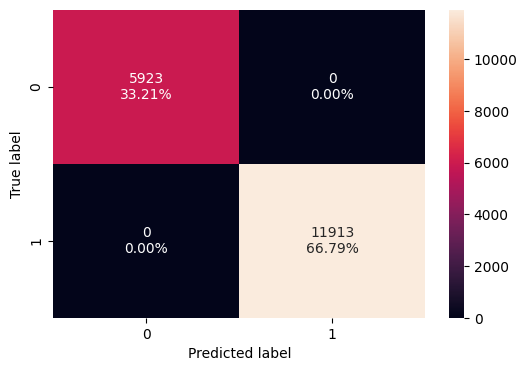

In [ ]:
confusion_matrix_sklearn(rf, X_train, y_train)

In [ ]:
rf_train_perf=model_performance_classification_sklearn(rf, X_train, y_train)
rf_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


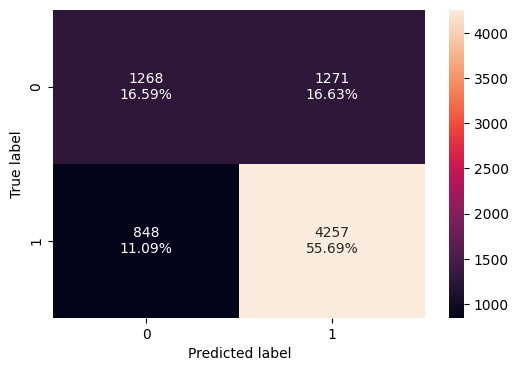

In [ ]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [ ]:
rf_test_perf=model_performance_classification_sklearn(rf, X_test, y_test)
rf_test_perf

,Accuracy,Recall,Precision,F1
0,0.722789,0.833888,0.77008,0.800715


- Nothing outstanding compared to previous models, and still has overfitting issues.

### Random Forest Tuned

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=25,
                       oob_score=True, random_state=1)

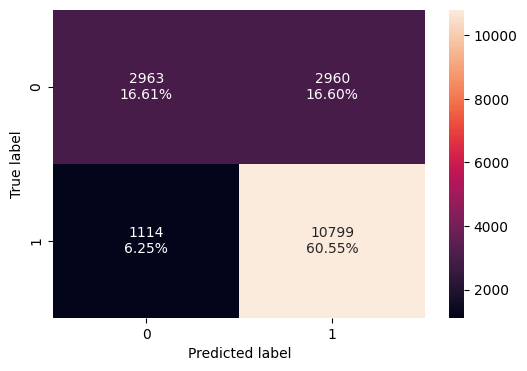

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_train_perf=model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.771586,0.906489,0.784868,0.841306


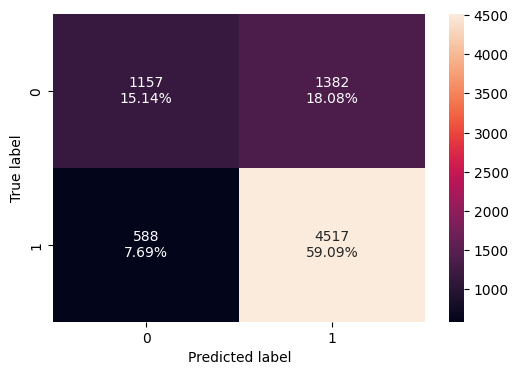

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_test_perf=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.742282,0.884819,0.765723,0.820974


- The tuned forest has some slight overfitting, but not as much compared to the previous models.
- Recall is very good and manages to get a good F1 score. Overall performance is similar to the tuned d_tree, these two are the best models so far.

## Boosting

### Adaboost

In [ ]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

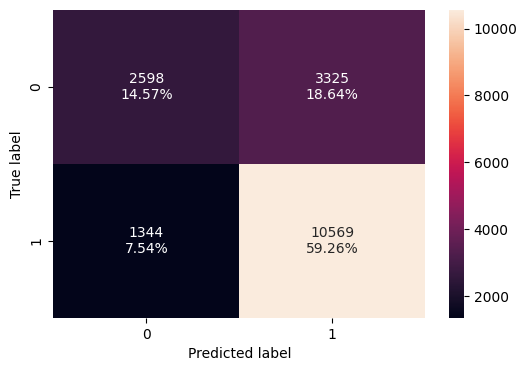

In [ ]:
confusion_matrix_sklearn(ab, X_train, y_train)

In [ ]:
ab_train_perf=model_performance_classification_sklearn(ab, X_train, y_train)
ab_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


- Overall performance is not the best, the model could be underfitting.

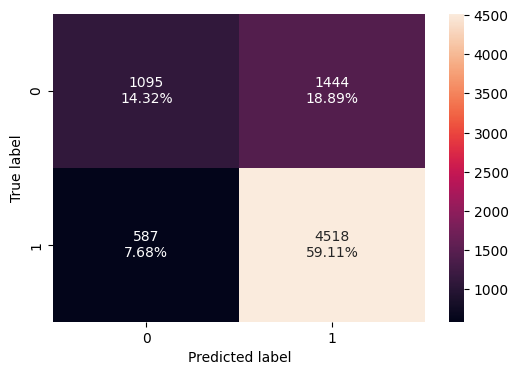

In [ ]:
confusion_matrix_sklearn(ab, X_test, y_test)

In [ ]:
ab_test_perf=model_performance_classification_sklearn(ab, X_test, y_test)
ab_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


- The model has almost no overfitting.
- Again, recall is higher than precision, and F1 is right between them.
- This is a very good model considering it hasn't been tuned.

### Adaboost tuned

In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring= acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

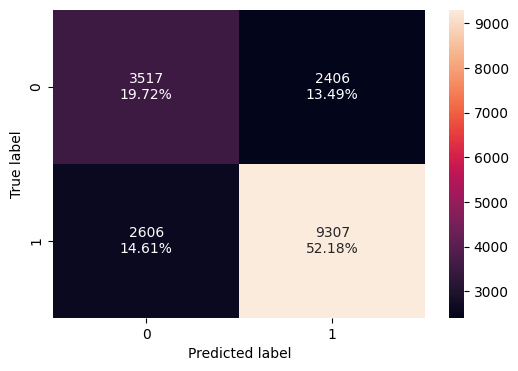

In [ ]:
confusion_matrix_sklearn(ab_tuned, X_train, y_train)

In [ ]:
ab_tuned_train_perf=model_performance_classification_sklearn(ab_tuned, X_train, y_train)
ab_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


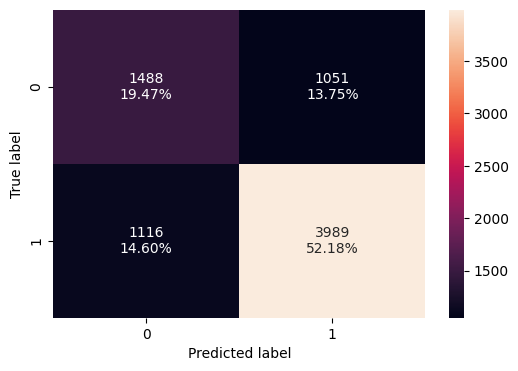

In [ ]:
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

In [ ]:
ab_tuned_test_perf=model_performance_classification_sklearn(ab_tuned, X_test, y_test)
ab_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


- The tuned AdaBoost practically has no overfitting.
- Train and test performance is acceptable, and it's the first model that has precision slightly higher than recall. Good results overall.

### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

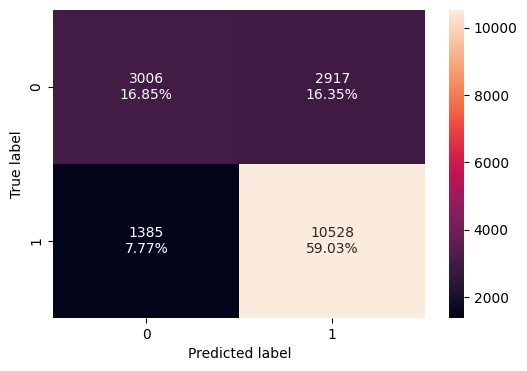

In [ ]:
confusion_matrix_sklearn(gb, X_train, y_train)

In [ ]:
gb_train_perf=model_performance_classification_sklearn(gb, X_train, y_train)
gb_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


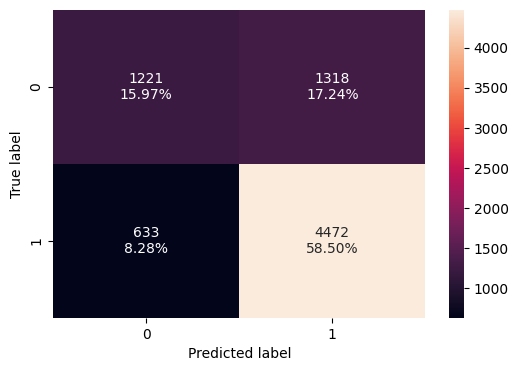

In [ ]:
confusion_matrix_sklearn(gb, X_test, y_test)

In [ ]:
gb_test_perf=model_performance_classification_sklearn(gb, X_test, y_test)
gb_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


- The model does not have overfitting issues.
- Recall is significantly higher compared to the tuned AdaBoost model, and F1 is slightly higher. The model has good prediction capabilities.

### Gradient Boosting tuned

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring= acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

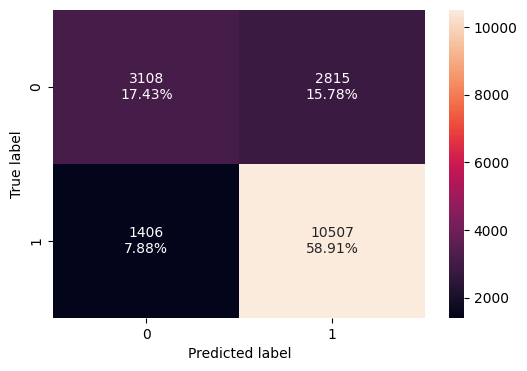

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_train, y_train)

In [ ]:
gb_tuned_train_perf=model_performance_classification_sklearn(gb_tuned, X_train, y_train)
gb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.763344,0.881978,0.788695,0.832732


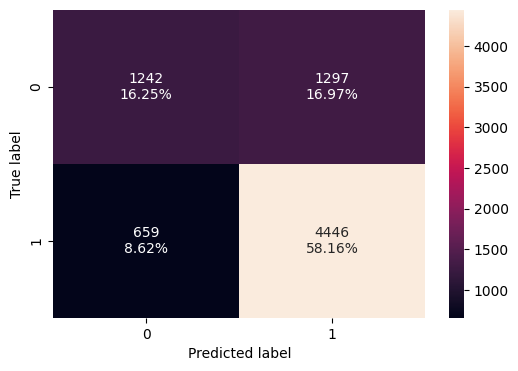

In [ ]:
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

In [ ]:
gb_tuned_test_perf=model_performance_classification_sklearn(gb_tuned, X_test, y_test)
gb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.744113,0.870911,0.77416,0.81969


- Overall very good metrics with very low overfitting. The next models could get slightly better, but if we want to prevent overfitting, I think the performance won't increase much. I think we're extracting the most we can out of the data. Let's see if it's true.

### XG Boost

In [ ]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

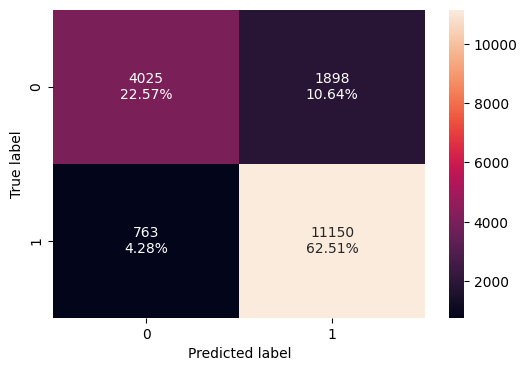

In [ ]:
confusion_matrix_sklearn(xgb, X_train, y_train)

In [ ]:
xgb_train_perf=model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


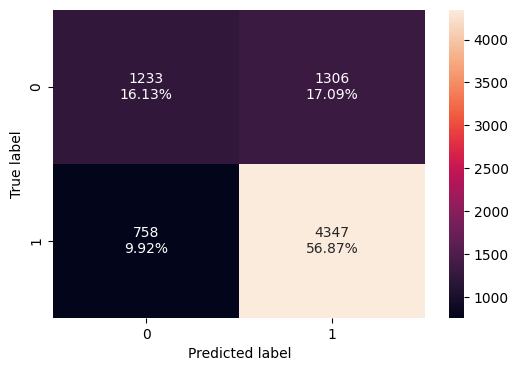

In [ ]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [ ]:
xgb_test_perf=model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_test_perf

,Accuracy,Recall,Precision,F1
0,0.729984,0.851518,0.768972,0.808143


- The model has overfitting issues.
- Performance on test is significantly lower compared to training.

### XGBoost Tuned

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

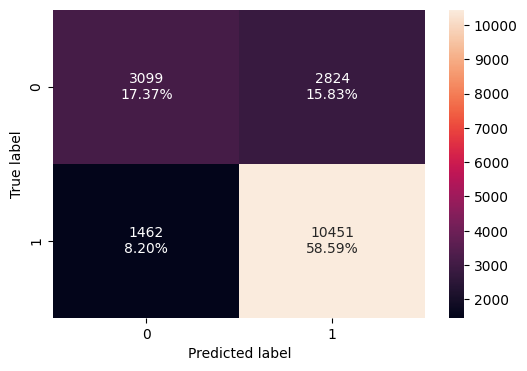

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_train_perf=model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.759699,0.877277,0.787269,0.82984


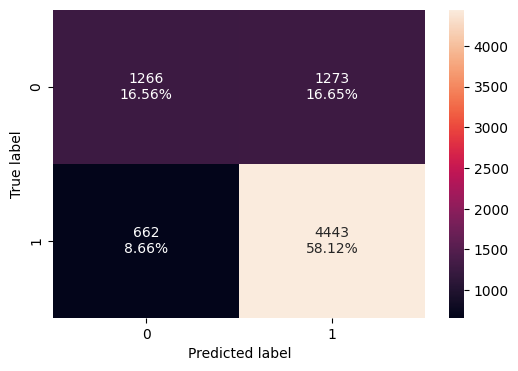

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_test_perf=model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.74686,0.870323,0.777292,0.821181


- The model has very good performance and does not have overfitting issues.
- As expected, recall is higher than precision, and F1 is ~80%.

## Stacking Classifier

- For the stacking classifier we'll use the best models so far based on the F1 score and proportion of recall vs precision.
- The models will be the adaboost (non-tuned), the tuned gradient boosting, and the tuned random forest.
- We could have used the bagging classifier and decision tree models too, but the tuned random forest had a slight better performance.
- The final estimator will be the tuned xgboost.


In [ ]:
estimators = [
    ("AdaBoost", ab),
    ("Gradient Boosting", gb_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 feature_types=None, gamma=5,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

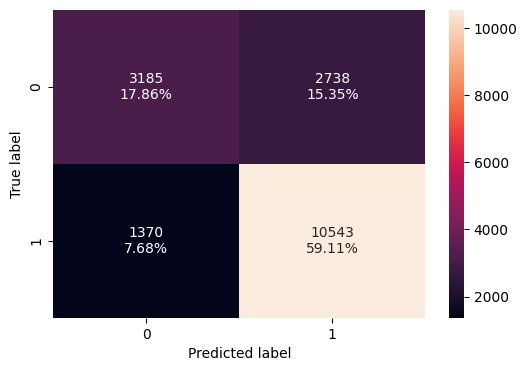

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_train_perf=model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_train_perf

,Accuracy,Recall,Precision,F1
0,0.769679,0.885,0.793841,0.836945


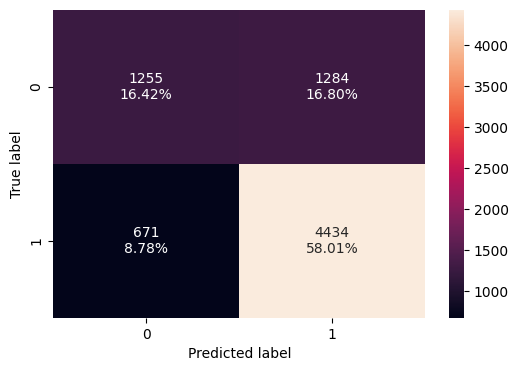

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_test_perf=model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.86856,0.775446,0.819366


- The model has more overfitting than expected, but it's still a good predictive model.
- Performance metrics are similar compared to the previous models, and has a similar proportion of recall vs precision, and a high F1-score.

## Model Performance Comparison and Conclusions

### Train Model Comparison

In [ ]:
train_models_comparison = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_train_perf.T,
        bagging_tuned_train_perf.T,
        rf_train_perf.T,
        rf_tuned_train_perf.T,
        ab_train_perf.T,
        ab_tuned_train_perf.T,
        gb_train_perf.T,
        gb_tuned_train_perf.T,
        xgb_train_perf.T,
        xgb_tuned_train_perf.T,
        stacking_classifier_train_perf.T,
    ],
    axis=1,
)
train_models_comparison.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
train_models_comparison

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985255,0.995739,1.0,0.771586,0.738226,0.718995,0.758802,0.763344,0.850807,0.759699,0.769679
Recall,1.0,0.931923,0.985898,0.999580,1.0,0.906489,0.887182,0.781247,0.883740,0.881978,0.935952,0.877277,0.885000
Precision,1.0,0.720067,0.991976,0.994073,1.0,0.784868,0.760688,0.794587,0.783042,0.788695,0.854537,0.787269,0.793841
F1,1.0,0.812411,0.988928,0.996819,1.0,0.841306,0.819080,0.787861,0.830349,0.832732,0.893394,0.829840,0.836945


### Test Model Comparison

In [ ]:
test_models_comparison = pd.concat(
    [
        dtree_test_perf.T,
        dtree_tuned_test_perf.T,
        bagging_test_perf.T,
        bagging_tuned_test_perf.T,
        rf_test_perf.T,
        rf_tuned_test_perf.T,
        ab_test_perf.T,
        ab_tuned_test_perf.T,
        gb_test_perf.T,
        gb_tuned_test_perf.T,
        xgb_test_perf.T,
        xgb_tuned_test_perf.T,
        stacking_classifier_test_perf.T,
    ],
    axis=1,
)
test_models_comparison.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
test_models_comparison

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.661695,0.706567,0.695186,0.731816,0.722789,0.742282,0.734301,0.716510,0.744767,0.744113,0.729984,0.746860,0.744244
Recall,0.742997,0.930852,0.766112,0.889128,0.833888,0.884819,0.885015,0.781391,0.876004,0.870911,0.851518,0.870323,0.868560
Precision,0.748569,0.715447,0.774916,0.753611,0.770080,0.765723,0.757799,0.791468,0.772366,0.774160,0.768972,0.777292,0.775446
F1,0.745773,0.809058,0.770489,0.815780,0.800715,0.820974,0.816481,0.786397,0.820927,0.819690,0.808143,0.821181,0.819366


- The best-performing models are the **Gradient Boost Classifier** and the **XGBoost Classifier Tuned**. These have the best performance metrics overall, and very small overfitting.


- Other models like the Tuned Random Forest, Stacking Classifier, and Tuned Gradient Boost have good metrics too, but not as good and also have slight overfitting.

### Important Variables

Let's see the important features of the best performing models.

Gradient Boost:

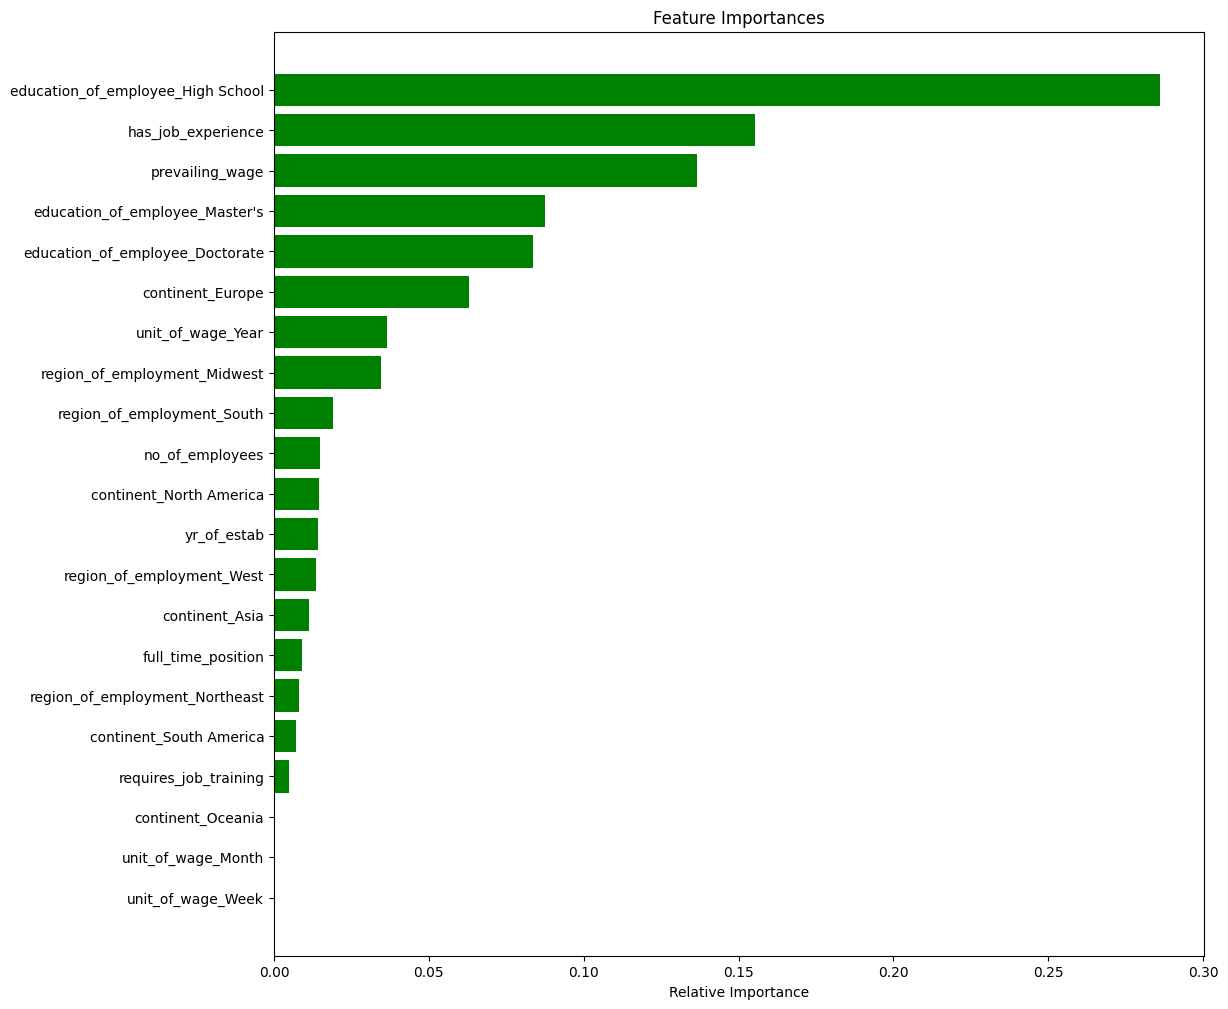

In [ ]:
feature_names = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

XGBoost Classifier Tuned:

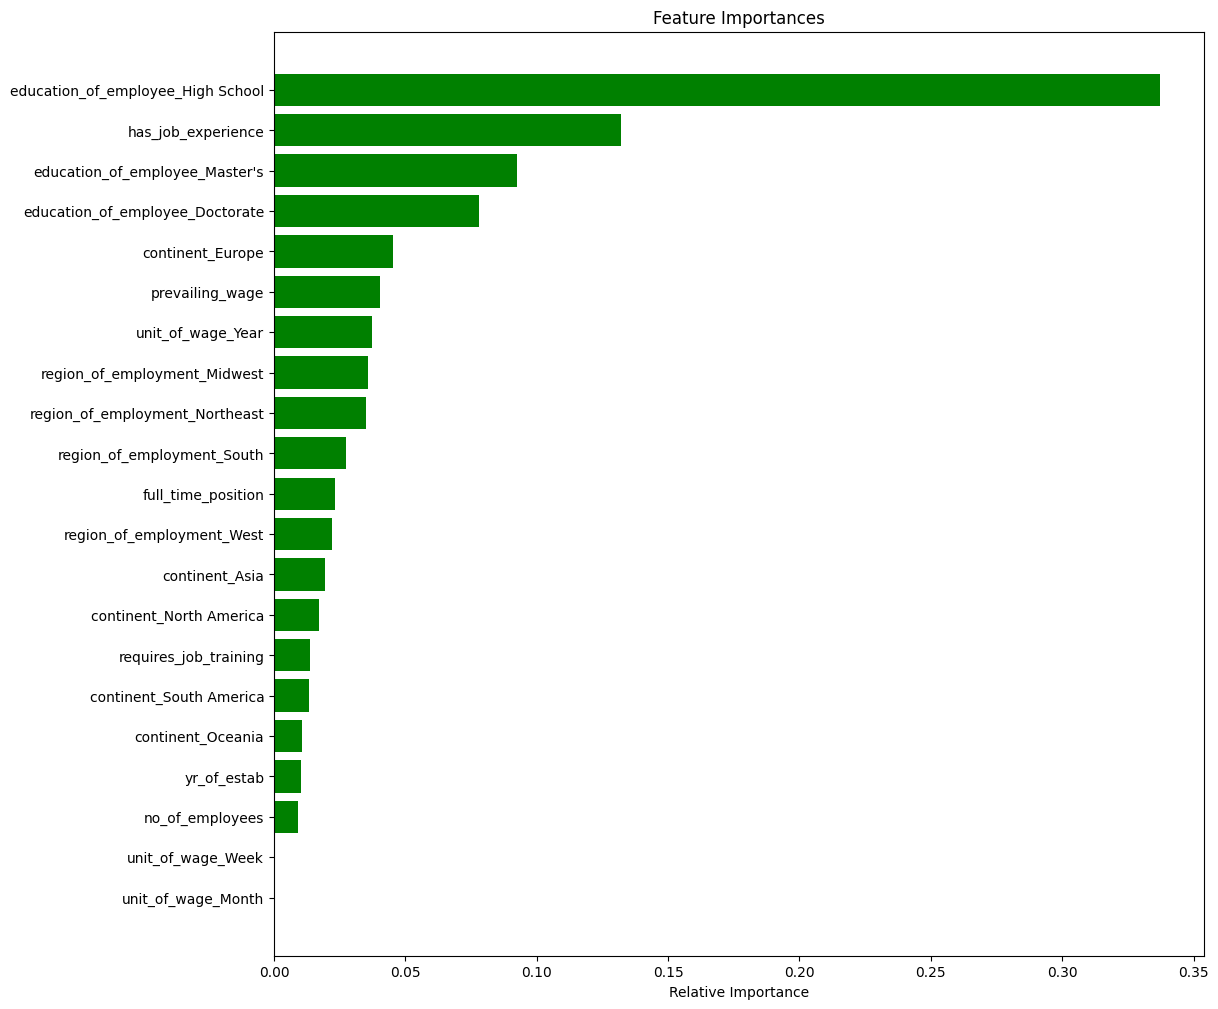

In [ ]:
importances1 = xgb_tuned.feature_importances_
indices = np.argsort(importances1)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances1[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Overall, the most important features are:

- If education level is High-school
- Job experience
- Prevailing wage
- If education level is Master's
- If education level is Doctorate's

## Actionable Insights and Recommendations

- We built multiple models with the capability to accurately predict if a visa is going to be certified or denied, and therefore help facilitate the process of visa approvals. The best models overall were: **Gradient Boost Classifier** and the **XGBoost Classifier Tuned**. Any of the two can be used to make the predictions.

- To get better results, the models should be tested against new test data, and then choose the best performing model to be launched.

- The most important features are: If education level is High-school, Job experience, Prevailing wage, If education level is Master's, If education level is Doctorate's.

- As the education level increases, the rate of visa acceptance increases too. Employees should aim to increase their education level and the employers should hire more educated talent to increase the chances of being certified.

- Employees should get work experience prior to applying, and employers should hire talent with working experience to maximize the chances of being accepted.

- Companies should aim to hire and apply to the visa using a yearly salary.

- Most continents have around 60% acceptance rate, with the exception of Africa and Europe which have closer to 70% and 80% respectively.

- Requiring job training doesn't seem to impact visa acceptance, therefore companies can require job training or not without risking lowering the chances of getting certified.

- The number of employees and year of establishment doesn't look like driving factors of acceptance, therefore companies off all sizes and 'ages' should be encouraged to apply.

- Most regions of employment get a similar acceptance rate; companies should not be discouraged by their employment region.

- Whether the visa is for a full-time job or not should not discourage any applying company.